In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets, model_selection

data2 = pd.read_csv('ArASL_data.csv', sep = ',')
data2.head(5)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0  jeem     235     234     233     233     232     232     231     231   
1  jeem     220     220     220     220     220     220     220     221   
2  jeem     211     212     214     216     215     215     214     213   
3  jeem      29      29      29      28      28      28      28      28   
4  jeem     236     236     236     236     236     236     236     236   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     230  ...       160       158       156       154       153       152   
1     221  ...       126       121       116       113       110       108   
2     214  ...       187       184       179       177       178       182   
3      28  ...       163       163       179       192       198       201   
4     238  ...       158       158       158       163       167       170   

   pixel781  pixel782  pixel783  pixel784  
0       151       150       149       148  
1       105       104       102       101  
2       188       189       189       187  
3       203       163        45        20  
4       174       179       184       183  

[5 rows x 785 columns]

In [13]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

In [4]:
data = downsample(data2,'label')

In [5]:
ratio=0.8
k=5

In [6]:
X_train = []
Y_train = []
x_train, x_test_p, y_train, y_test_p=train_test_split(data.drop(['label'], axis=1), data[['label']], test_size=1-ratio)

x_test = x_test_p.to_numpy()
y_test = y_test_p.to_numpy().reshape(len(y_test_p))
x_train_f = x_train.to_numpy()
y_train_f = y_train.to_numpy().reshape(len(y_train))


for i in range(0,k-1):
    x_train_1, x_train_2, y_train_1, y_train_2=train_test_split(x_train, y_train, test_size=1/(k-i))
    X_train.append(x_train_2.to_numpy())
    Y_train.append(y_train_2.to_numpy().reshape(len(y_train_2)))
    x_train = x_train_1.copy()
    y_train = y_train_1.copy()
X_train.append(x_train_1.to_numpy())
Y_train.append(y_train_1.to_numpy().reshape(len(y_train_1)))
   
for i in range(len(X_train)):
    print(X_train[i].shape, Y_train[i].shape)
print(x_test.shape,y_test.shape)



(5141, 784) (5141,)
(5141, 784) (5141,)
(5140, 784) (5140,)
(5140, 784) (5140,)
(5140, 784) (5140,)
(6426, 784) (6426,)


In [7]:
def accuracy(y,y_hat):
  yb = (y == y_hat)
  return np.sum(yb)/np.size(y)

In [8]:
K_max = 5
X_print=np.linspace(1,K_max,K_max)
Y_print=[]
Acc_mean=[]
for k in range(1,K_max+1):
    Acc = []
    print(k)
    for i in range(len(X_train)):
        x_val = X_train[i]
        y_val = Y_train[i]
        list_x = np.array(X_train)
        list_y = np.array(Y_train)
        list_x = np.delete(list_x,i)
        list_y = np.delete(list_y,i)
        x_train = list_x[0]
        y_train = list_y[0]
        for j in range(1,len(list_x)):
            x_train_2 = x_train.copy()
            y_train_2 = y_train.copy()
            x_train = np.concatenate((x_train_2,list_x[j]))
            y_train = np.concatenate((y_train_2,list_y[j]))
        print(x_train.shape,y_train.shape)
        knn_model_scikit = neighbors.KNeighborsClassifier(k, algorithm='kd_tree')
        knn_model_scikit.fit(x_train, y_train)
        y_hat_scikit = knn_model_scikit.predict(x_val)
        Acc.append(accuracy(y_val, y_hat_scikit))
    Acc_mean.append(np.mean(Acc))
print(Acc_mean)


        
                                     
                        
    
    
    
    

1
(20561, 784) (20561,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)
<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-i

(20561, 784) (20561,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
2
(20561, 784) (20561,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)
<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-i

(20561, 784) (20561,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
3


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
4


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
5


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20561, 784) (20561,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)


<ipython-input-8-b40371b139ea>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x = np.array(X_train)
<ipython-input-8-b40371b139ea>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y = np.array(Y_train)


(20562, 784) (20562,)
[0.9809741704175708, 0.9741653162907185, 0.971597457534114, 0.9666174047502455, 0.9631935072965714]


In [7]:
(X_train[0].to_numpy()+X_train[1].to_numpy()).size()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [8]:
A=np.concatenate((X_train[0],X_train[1]))
print(A.shape)
print(np.concatenate((A,X_train[2])).shape)

(13670, 784)
(20505, 784)


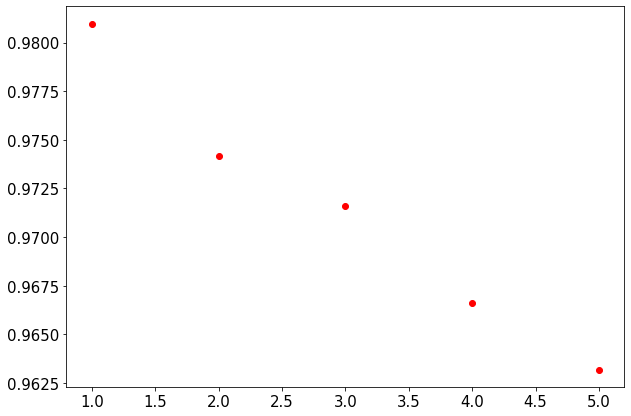

In [12]:
##plt.xlabel('K')
##plt.ylabel('Accuracy')
##plt.title('Means of cross-validation accuracy')

plt.figure(figsize=(10, 7))
plt.plot(X_print,Acc_mean,'ro')
plt.savefig('figure1'
       )

In [5]:
Acc_mean = [0.9809741704175708, 0.9741653162907185, 0.971597457534114, 0.9666174047502455, 0.9631935072965714]
X_print=np.linspace(1,5,5)

In [10]:
knn_model_scikit = neighbors.KNeighborsClassifier(1, algorithm='kd_tree')
knn_model_scikit.fit(x_train_f, y_train_f)
y_hat_scikit = knn_model_scikit.predict(x_test)
print(accuracy(y_test, y_hat_scikit))


0.9827264239028944


In [1]:
Acc_mean =. 

NameError: name 'Acc_mean' is not defined